In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# Showing matplotlib plots in jupyter notebook
%matplotlib inline

In [98]:

# Using patientId for better intitution
# Drawing polar heatmap
# Learning curve with smaller numbers
# How we can use SVR for Regression
# Making module for finding best functino of sklearn

In [101]:
# Getting Training dataset
# Import dataset as Dataframe
df_full = pd.read_csv("slice_localization_data.csv", sep=',')

# Import dataset as numpy array
X_full = np.genfromtxt("slice_localization_data.csv", delimiter=',', skip_header=1)

# Making distnict output column for later uses
y = X_full[:,385]

# Removing first and last column from the dataset
X = X_full[:,1:385]

# Converting X to Dataframe
df = pd.DataFrame(X)
df.columns = df_full.columns[1:385]

# Getting size of the Training Dataset
m,n = X.shape

In [ ]:
# Getting shape of the Dataset
X_full.shape

(53500, 386)

In [ ]:
# Getting first 10 rows of the numpy array
X_full[0:10]

array([[ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        21.803851],
       [ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        21.745726],
       [ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        21.6876  ],
       ...,
       [ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        21.396971],
       [ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        21.28072 ],
       [ 0.      ,  0.      ,  0.      , ..., -0.25    , -0.25    ,
        22.617612]])

In [ ]:
# Getting first 10 rows of the dataframe
df_full.head(10)

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348
5,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.953202,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.513223
6,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.000000,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.455097
7,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.867572,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.396971
8,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.930170,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.280720
9,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.990034,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,22.617612


In [ ]:
# Getting some intuition of data
df_full.describe()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


In [ ]:
# Gettign unqiue values of the "Patient ID"
np.unique(df_full["patientId"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

In [102]:
# Import mean_squared_error function from Sklearn Library
from sklearn.metrics import mean_squared_error

def plotLearningCurves(X,y,step):
    
    m,n = X.shape
    maxVal = (int)(m / 10) * 10
    N_size_arr = np.arange(10, maxVal + 10, step)
    error_arr = np.zeros(( len(np.arange(10, maxVal + 10, step)) ,2 ))
    index = 0
    
    # Increasing train dataset size, "step" times in each iteration
    for i in N_size_arr:
        
        # Splitting Training dataset with size i into train and cross validation sets
        X_train, X_test, y_train, y_test = train_test_split(X[:i,:], y[:i], test_size=0.33, random_state=42)
        
        # Fitting Model
        lm.fit(X_train, y_train)
        
        # Computing both mean squared error of training dataset and cross validation datasets predections
        error_arr[index,0] = mean_squared_error(y_train , lm.predict(X_train))
        error_arr[index,1] = mean_squared_error(y_test, lm.predict(X_test))
        
        # Increasing index with 1
        index += 1
    
    # Initializing the figure
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_yscale('log')
    
    # Plotting "Training set size" vs. "Mean Squared Error" for both of the train and cross validation dataset's errors
    line1, = ax.plot(N_size_arr,error_arr[:,0], c='red')
    line2, = ax.plot(N_size_arr,error_arr[:,1], c='blue')
    
    # Adding labels && legends to our plot
    ax.set_xlabel("N (Training set size)")
    ax.set_ylabel("Mean Squared Error")
    
    ax.legend((line1,line2),("Train Error","Test Error"))

<Axes: ylabel='Density'>

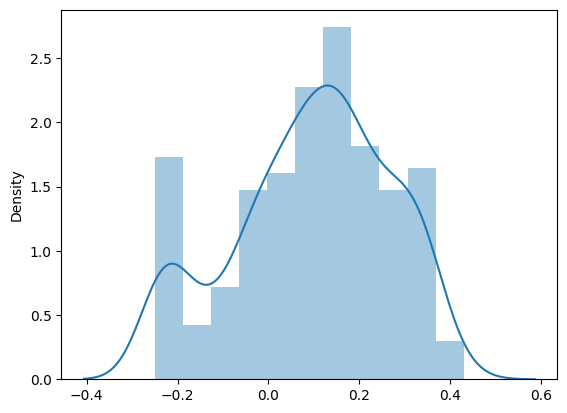

In [103]:
# Plot "Means of each column in dataset( Attributes ) except first and last column"  distplot
sns.distplot(df.mean())

# ===> We can conclude all of our attributes are in [-1,1] range, so we don't need to use feature normalize technique

Text(0.5, 0, 'Air Inclusion')

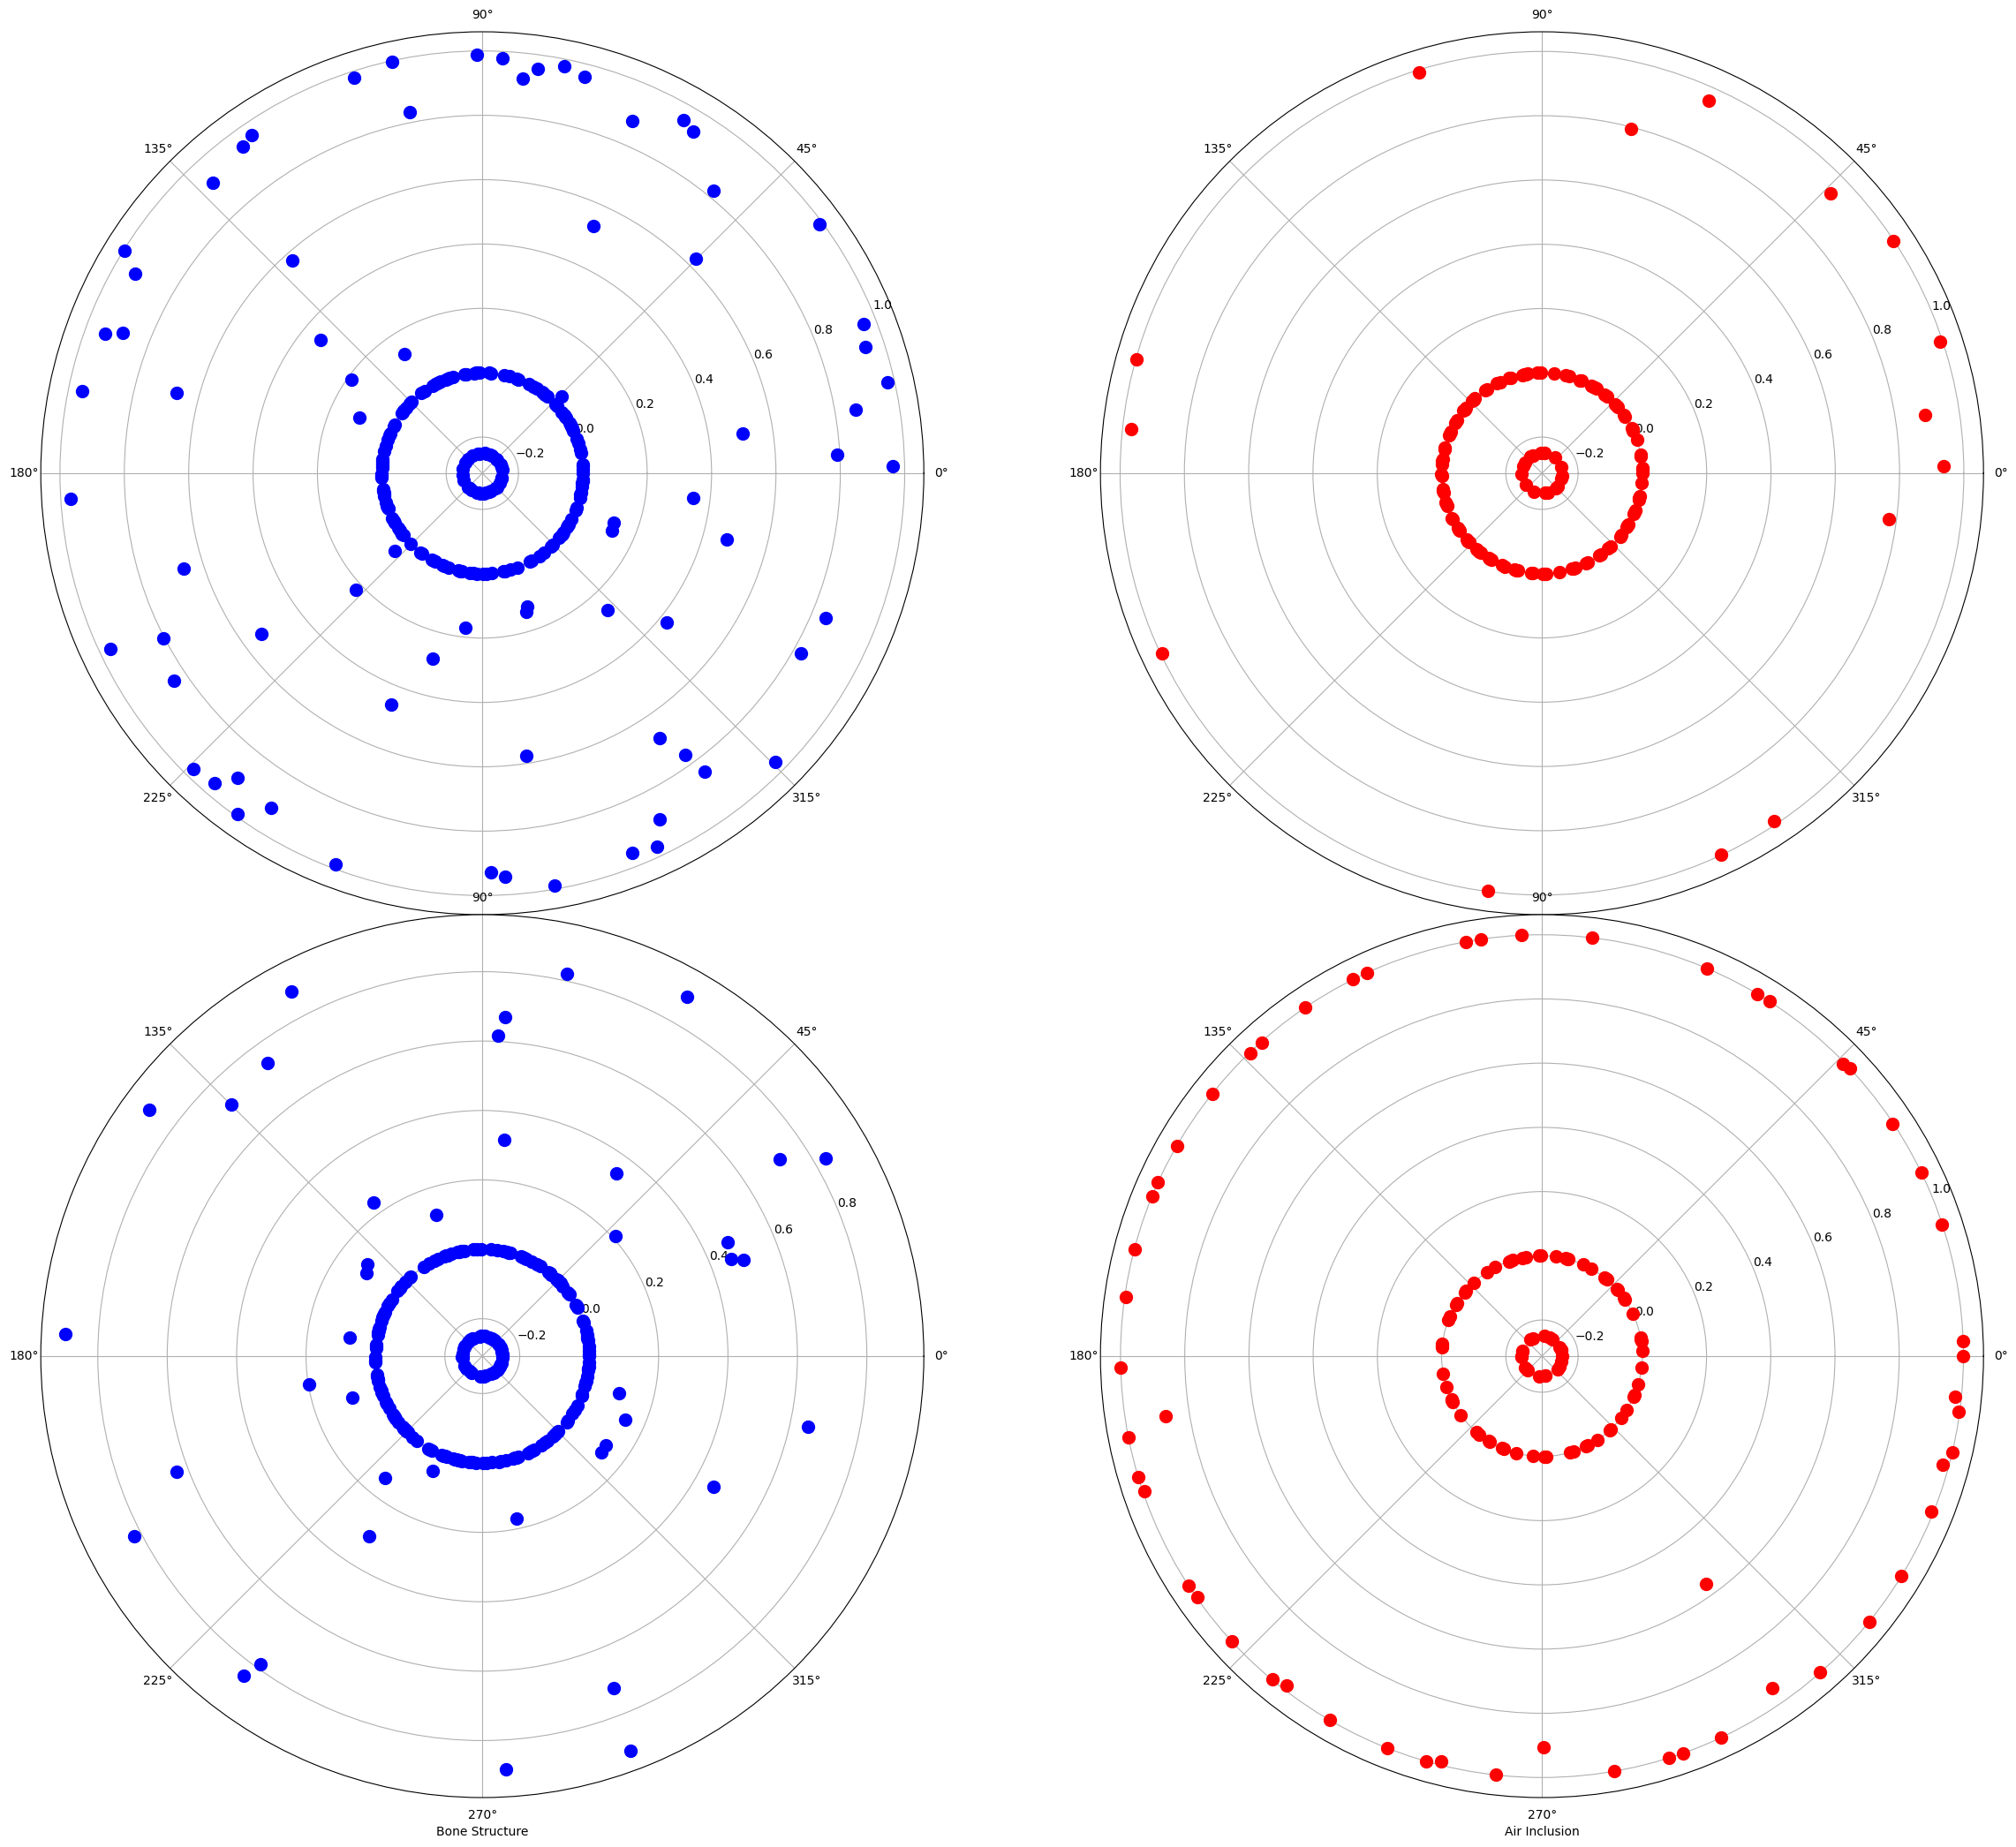

In [104]:
fig = plt.figure(figsize=(12,10))

axes1 = fig.add_axes([0, 2, 1, 1], projection='polar')
axes2 = fig.add_axes([1, 2,1,1], projection='polar')
axes3 = fig.add_axes([0, 1, 1, 1], projection='polar')
axes4 = fig.add_axes([1, 1,1,1], projection='polar')

# Plotting first example of bone structure of the one person
axes1.plot(X[150,1:241], 'bo', ms=10)
axes1.set_xlabel("Bone Structure")

# Plotting first example of air inclusion of the one person
axes2.plot(X[150,241:386], 'ro', ms=10)
axes2.set_xlabel("Air Inclusion")

# Plotting second example of bone structure of the one person
axes3.plot(X[3541,1:241], 'bo', ms=10)
axes3.set_xlabel("Bone Structure")

# Plotting second example of air inclusion of the one person
axes4.plot(X[3541,241:386], 'ro', ms=10)
axes4.set_xlabel("Air Inclusion")

<Axes: ylabel='Density'>

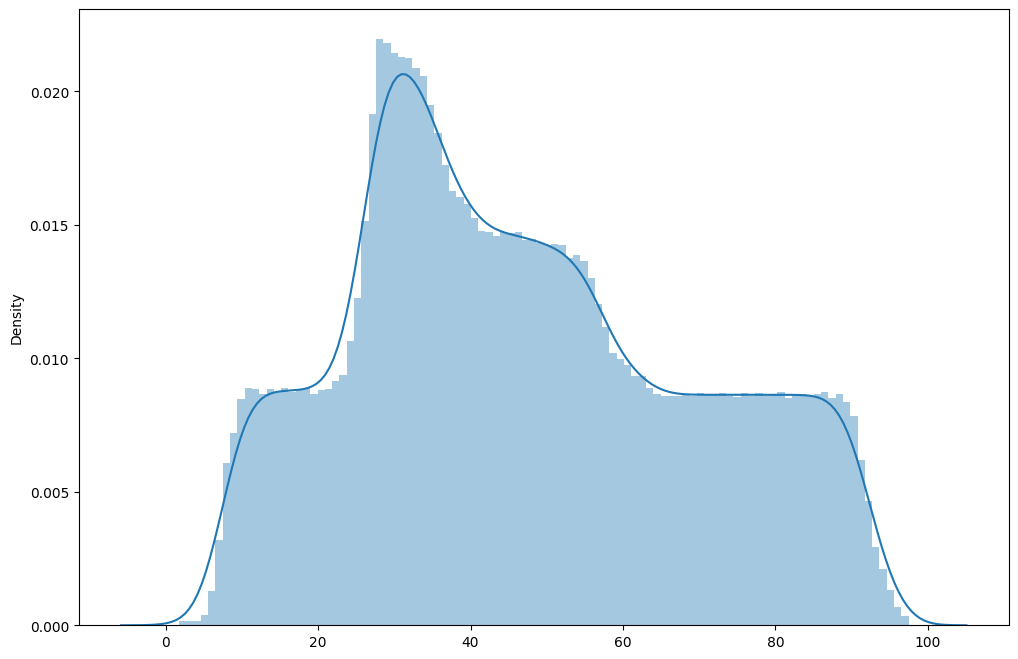

In [ ]:
# Plot "Reference" column distplot
plt.figure(figsize=(12,8))
sns.distplot(y, bins=100)

# ==> We can see that we don't have any image for locations of body with value bigger than 100, and majority of the
# images are taken with values in [25,40] range

In [ ]:
X.shape

(53500, 384)

In [ ]:
y.shape

(53500,)

In [ ]:
# Using SkLearn Library "Linear Regression" Method
from sklearn.linear_model import LinearRegression

# Initialization Model
lm = LinearRegression()

In [ ]:
# Splitting Data into Training and Cross Validation Datasets
# Using Sklearn library for splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [105]:
# Fitting Model with Train dataset ( Columns except "PatientId", "Reference")
lm.fit(X_train,y_train)

LinearRegression()

In [108]:
# Model Thetas
lm.coef_

array([-2.49139644e+00, -4.58502089e-01,  7.26167872e-01,  6.52902084e+00,
        6.38654698e+00,  3.24048164e+00,  7.23288435e-01,  3.06938443e+00,
       -5.52715306e+00, -6.00785870e-01, -1.79162052e+00,  2.79549349e-02,
        3.75662769e-01,  6.48676626e-01, -1.80406828e-01,  2.49750123e-01,
        1.12356497e+00,  6.98536155e-01, -3.32762311e+00,  3.61470101e+00,
        1.58589063e+00, -3.80099049e-01, -2.39595240e+00,  1.41914271e+00,
       -7.38345956e-01, -5.54360632e-01, -5.11193698e-01, -9.06976612e+00,
        1.08645539e+01,  3.18057390e+00,  5.40782643e-01,  7.84555788e-01,
       -5.30038039e-01,  2.45851101e-01,  4.24230168e-01, -3.71670405e+00,
       -4.16082206e+00, -6.64682882e-01, -8.12725681e+00,  2.29882919e+00,
       -3.84686509e+00, -7.87658414e-01, -3.09123430e+00, -6.19272063e-02,
       -2.16265627e+00, -2.24624141e+00, -3.45540532e-01,  1.77183929e+00,
        4.45896801e+13,  1.96481288e+12, -2.86613317e+00,  3.24674409e-01,
       -1.21616137e+00, -

In [109]:
# Predecting Reference values with Cross validation dataset
pred = lm.predict(X_test)

# Evaluating error with squared error method without using SkLearn Library
eval_err = np.sum( ( pred - y_test ) ** 2 , axis=0 ) / len(pred)
eval_err

68.60886202830528

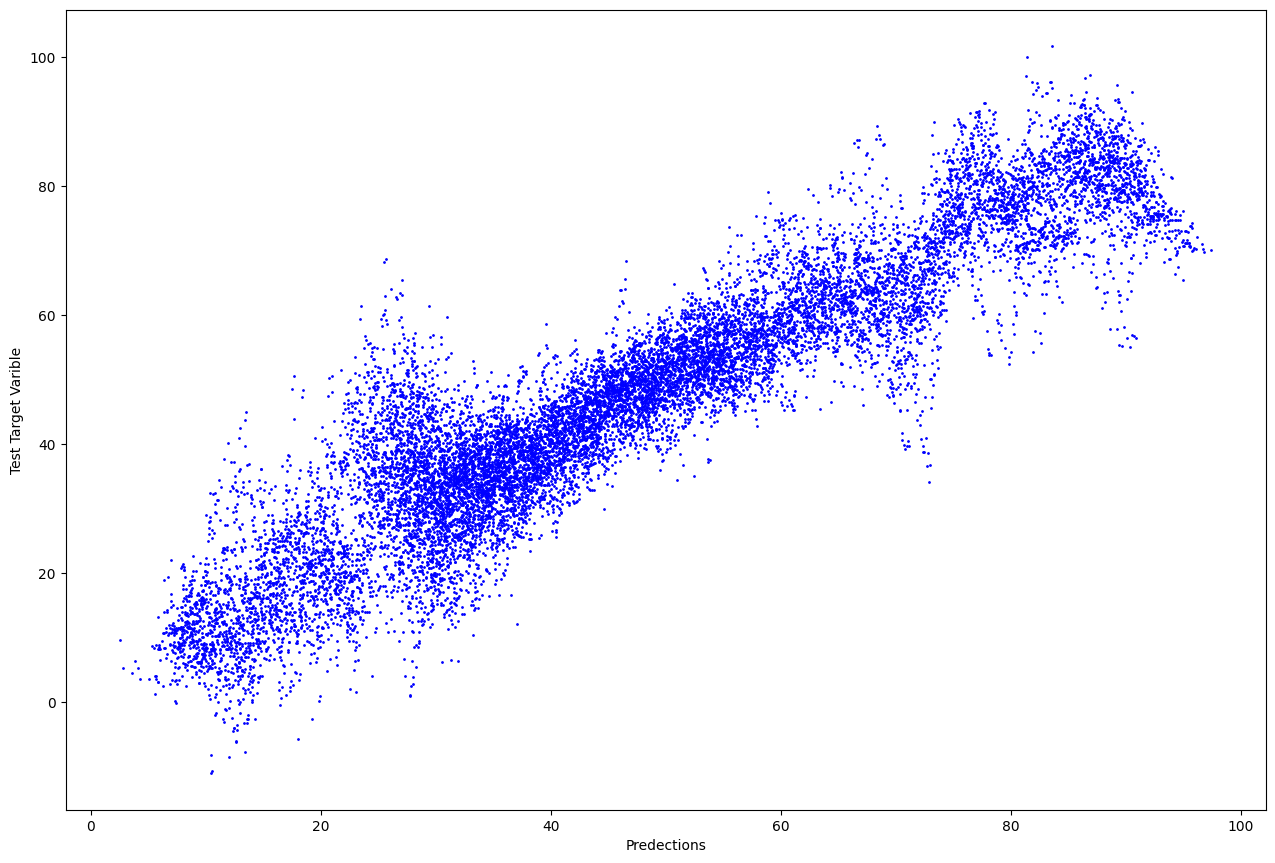

In [110]:
# Plot predections vs. y_test for better understanding how our model works!
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("Predections")
ax.set_ylabel("Test Target Varible")
ax.plot(y_test, pred,'bo',ms=1)

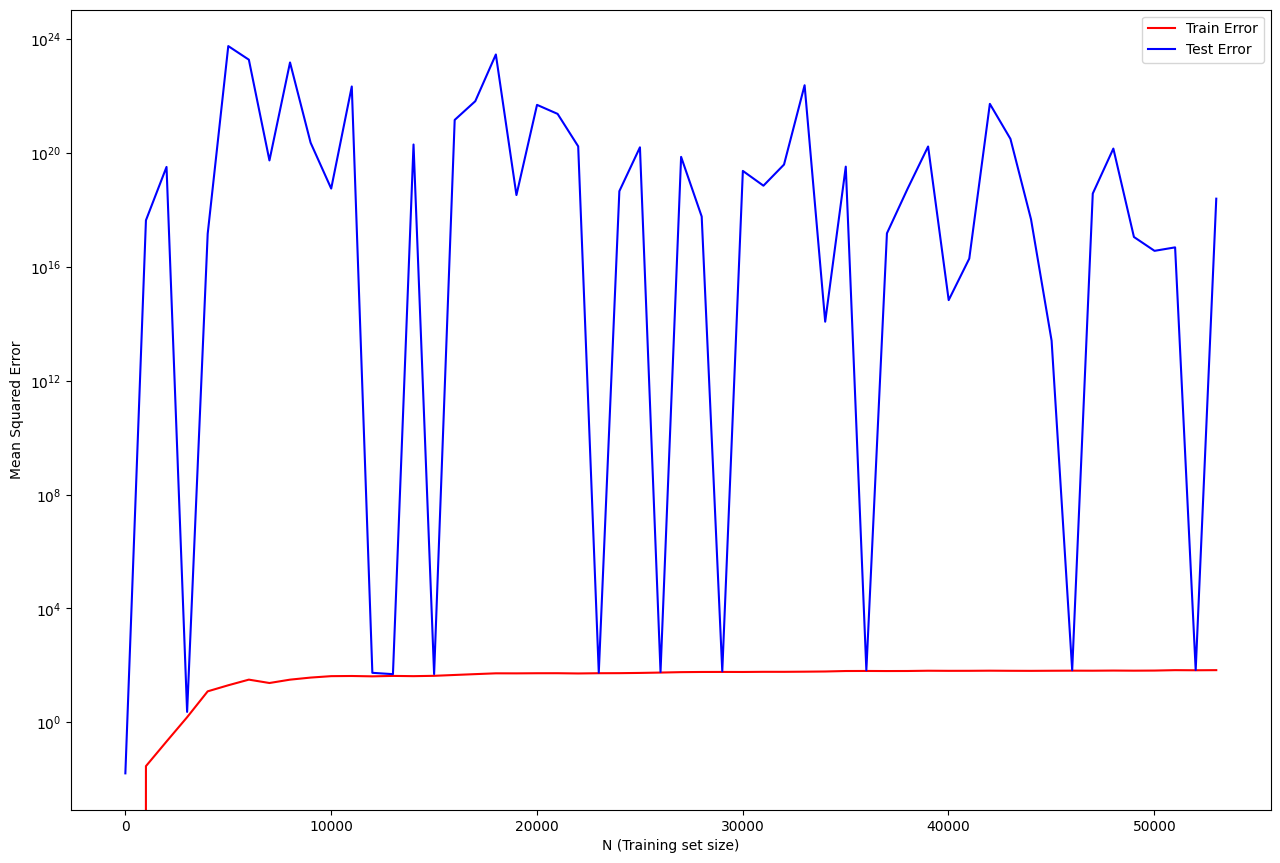

In [111]:
plotLearningCurves(X,y,1000)

In [112]:
# Checking error on Train set value and Comparing it with Test dataset error
pred_train = lm.predict(X_train)
mean_squared_error(pred_train,y_train)

# ===> We can see both of the MSE on Training Dataset && Cross validation Dataset is high, so maybe algorithm suffers from High bias

1.1715709013405612e+18

In [113]:
# Normalize features but maybe it doesn't help, but it can help for decreasing time of the fitting algorithm
lm.normalize = True
lm.fit(X_train,y_train)

LinearRegression()

In [114]:
pred_train = lm.predict(X_train)
mean_squared_error(pred_train, y_train)

# ===> We can see normalizing doesn't help

68.26505700841899

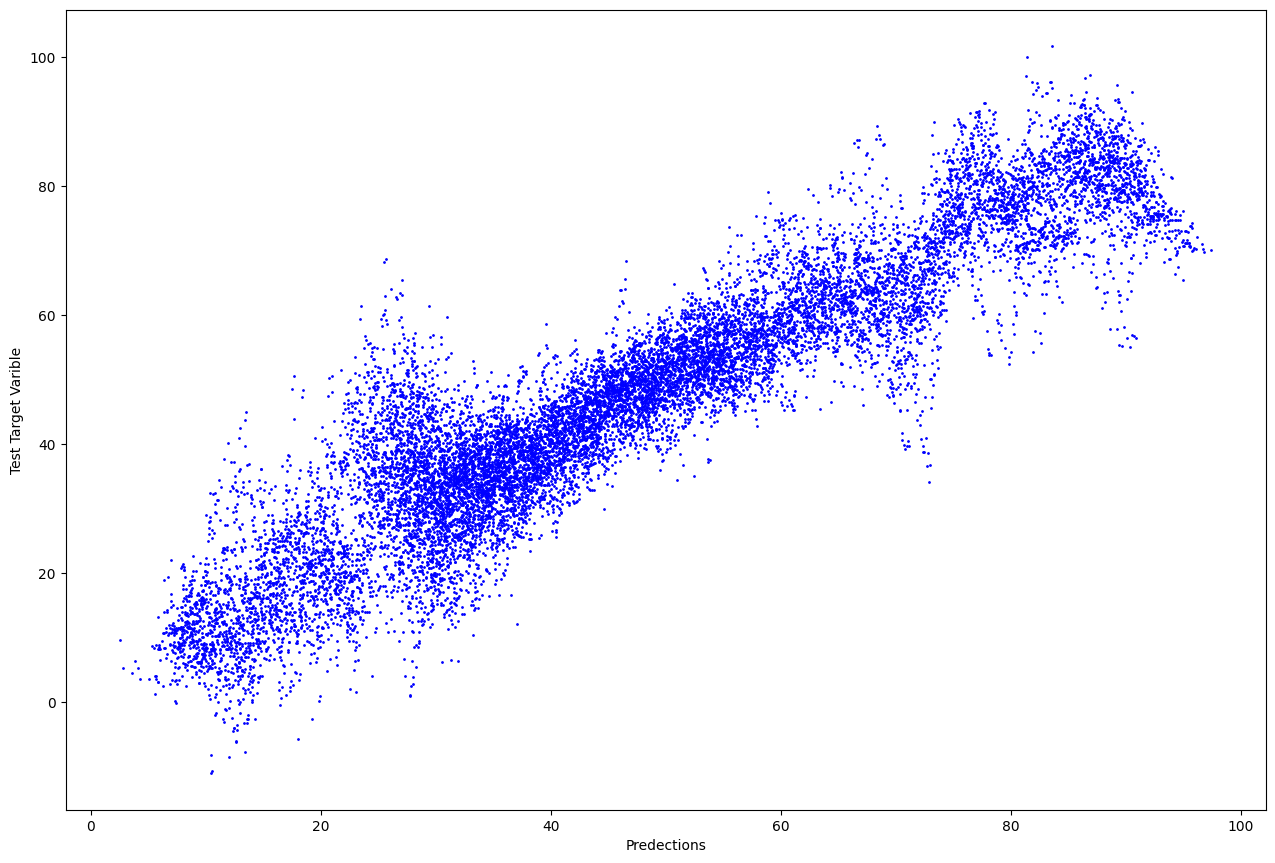

In [115]:
# Plot predections vs. y_test for better understanding how our model works!
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel("Predections")
ax.set_ylabel("Test Target Varible")
ax.plot(y_test, pred,'bo',ms=1)